In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd


In [2]:
max_features=10000 # We will take into consideration the most frequently used 10,000 words.

In [3]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# We want to padding the data so that all sequences have the same length.
# Each comment will be limited to 100 words
maxlen=100
x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)


In [6]:
def build_lstm_model():
    model=Sequential()
    model.add(Embedding(input_dim=max_features,output_dim=64,input_length=maxlen))
    model.add(LSTM(units=10))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation="sigmoid"))

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model=build_lstm_model()
model.summary()

early_stopping=EarlyStopping(monitor="val_loss",patience=3,verbose=2,restore_best_weights=True)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history=model.fit(x_train,y_train,
          epochs=10,
          batch_size=16,
          validation_split=0.2,
          callbacks=[early_stopping]
          )

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.9192 - loss: 0.2558 - val_accuracy: 0.8402 - val_loss: 0.3713
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.9348 - loss: 0.2194 - val_accuracy: 0.8362 - val_loss: 0.3901
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.9495 - loss: 0.1839 - val_accuracy: 0.8338 - val_loss: 0.4000
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.9538 - loss: 0.1671 - val_accuracy: 0.8294 - val_loss: 0.4511
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


In [11]:
accuracy,loss=model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8382 - loss: 0.3788


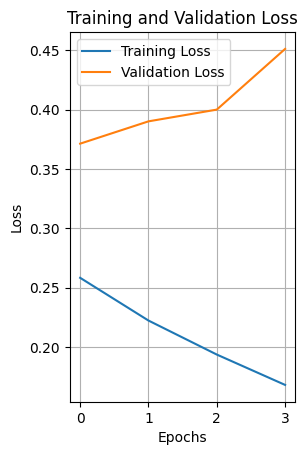

In [12]:
plt.figure()

#loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)

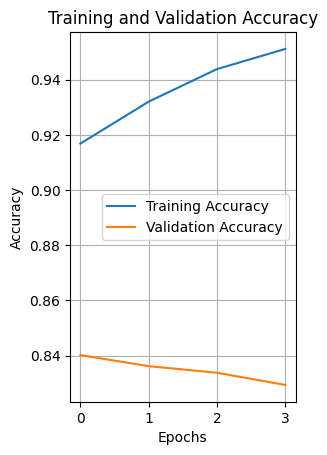

In [13]:
#accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)